In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [13]:
# Look at what sklearn gives us
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
# Read in and structure the data nicely
irData = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# Adding the species classifications to the DF
identNum = pd.Series(iris['target'])
identName = pd.Series([iris['target_names'][i] for i in identNum])
irData['ident'] = identNum
irData['ident2'] = identName
# For plotting in the cor-scat-plot below
featureNames = iris['feature_names']
nfeatures = len(iris['feature_names'])

irData.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ident,ident2
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [ ]:
# Didn't work for some reason :(
panelWidth=3
panelHeight=3
marginWidth = 0.5
marginHeight = 0.5

figureWidth=(panelWidth * nfeatures) + (marginWidth * (nfeatures+1))
figureHeight=(panelHeight * nfeatures) + (marginHeight * (nfeatures+1))

plt.figure(figsize=(figureWidth,figureHeight))

relativePanelWidth=panelWidth/figureWidth
relativePanelHeight=panelHeight/figureHeight

##########################################################################
########### Main panel placement #########################################

#             left,bottom,width,height
panel_list = []
for x in range(nfeatures):
    inner_panel_list = []
    for y in range(nfeatures):
        x_placement = (x+1)*(marginWidth/figureWidth) + x*relativePanelWidth
        y_placement = (y+1)*(marginHeight/figureHeight) + y*relativePanelHeight
        panel=plt.axes([x_placement,y_placement,relativePanelWidth,relativePanelHeight])
        inner_panel_list.append(panel)
    panel_list.append(inner_panel_list)
panel_list = np.array(panel_list)


# for panel in panel_list:
# 	panel.tick_params(bottom=True, labelbottom=True,
# 		left=True, labelleft=True,
# 		right=False, labelright=False,
# 		top=False, labeltop=False)

# 	#panel.set_xlim(0,15)
# 	#panel.set_ylim(0,15)

for x,featureX in enumerate(featureNames):
    for y,featureY in enumerate(featureNames):
        panel_list[x,y].scatter(irData[featureX], irData[featureY])

In [116]:
plt.show()

In [113]:
display(panel_list)

array([[<Axes:>, <Axes:>, <Axes:>, <Axes:>],
       [<Axes:>, <Axes:>, <Axes:>, <Axes:>],
       [<Axes:>, <Axes:>, <Axes:>, <Axes:>],
       [<Axes:>, <Axes:>, <Axes:>, <Axes:>]], dtype=object)

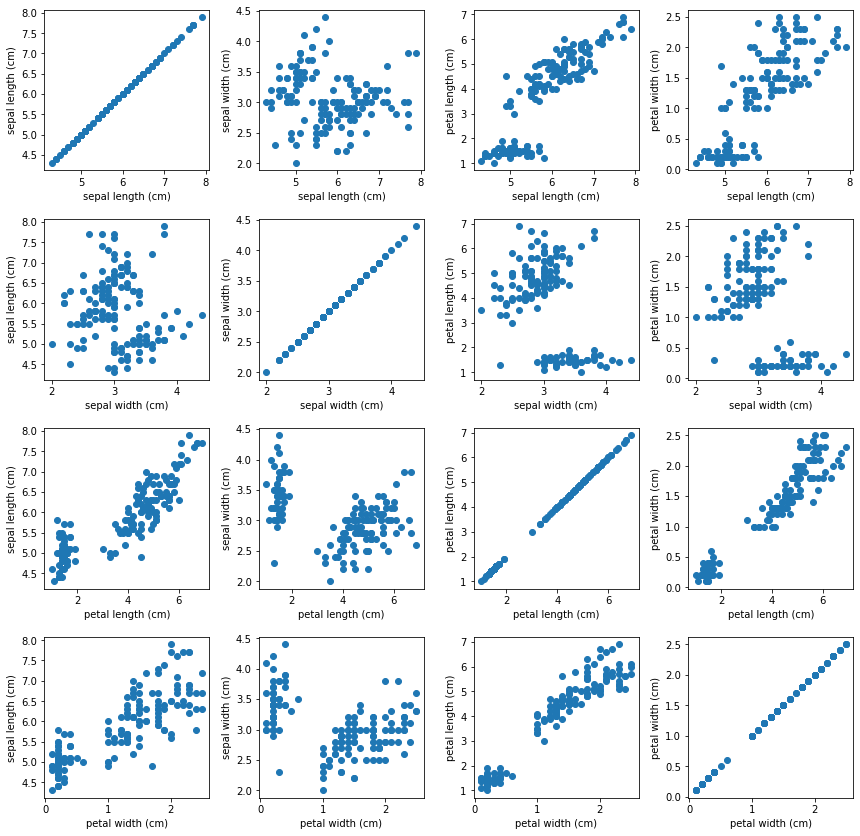

In [133]:
# This works though, but takes away a little of my control
panelWidth=3
panelHeight=3
marginWidth = 0.5
marginHeight = 0.5
figureWidth=(panelWidth * nfeatures) + (marginWidth * (nfeatures+1))
figureHeight=(panelHeight * nfeatures) + (marginHeight * (nfeatures+1))

# Using subplots and buffering some space
fig, axs = plt.subplots(nrows=nfeatures, ncols=nfeatures, figsize=(figureWidth,figureHeight))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
# Loop over my features and plot them against each other.
for x,featureX in enumerate(featureNames):
    for y,featureY in enumerate(featureNames):
        axs[x,y].scatter(irData[featureX], irData[featureY])
        axs[x,y].set_xlabel(featureX)
        axs[x,y].set_ylabel(featureY)
# Only the diagonal and up actually matters, the other ones are repeats.
plt.show()

In [ ]:
s